# Time series in Pandas

## datetime module in python

In [11]:
from datetime import datetime
# 'Month-Day-Year' : string type
date_str = '09-19-2018'
# string type -> time type
date_object = datetime.strptime(date_str, '%m-%d-%Y').date()
print(type(date_object))
print(date_object)
print(date_object.day)
print(date_object.month)
print(date_object.weekday()) # 날짜를 숫자로

<class 'datetime.date'>
2018-09-19
19
9
2


In [21]:
date_str_1 = '180919'
date_str_2 = '180925'
date_object_1 = datetime.strptime(date_str_1, '%y%m%d').date()
date_object_2 = datetime.strptime(date_str_2, '%y%m%d').date()
day_gap = date_object_2 - date_object_1
print(day_gap)
print(day_gap.days)
day_gap

6 days, 0:00:00
6


datetime.timedelta(days=6)

### 데이터 전처리와 strptime 예시

In [ ]:
# .T : 전치(행열바꿈), 1번째 행부터 보여라, reset_index : index 정리 (0~...) 
pd.read_csv("filename", encoding="cp949",sep="\t").T[1:].reset_index()

# data column name change, str이면 "", int면 "" 필요 X
df.rename(columns={"기존name":"바꿀name"})

# .을 기준으로 str type인 date를 나눠라 
df["date"].str.split(".")


def rename_date(X):
    return "-".join([value.strip() for value in x[:2]])

# df["date"] 정리해주기, dtypes 변경
df["date"] = pd.to_datetime(df["date"], format = '%Y-%m-%d')

# float type으로 변경 => .astype()
df["수치"].astype(float)

# date를 index로
df = df.set_index("date")

pd.crosstab(df.index, df["지표"], df["수치"], aggfunc=sum)

## Time resampling

> read_csv(parse_dates = ['datetime']) # datetime인 column을 datetime으로 불러움

In [24]:
import os
import pandas as pd

In [31]:
DATA_DIR = 'data'
TRAIN_PATH = os.path.join('..', DATA_DIR, 'bike_demand.csv')
df = pd.read_csv(TRAIN_PATH, parse_dates=['datetime'])
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [32]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [41]:
df = df.set_index('datetime')

KeyError: "None of ['datetime'] are in the columns"

In [49]:
print(df.index.month)
print(df.index.year)

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='datetime', length=10886)
Int64Index([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012],
           dtype='int64', name='datetime', length=10886)


In [52]:
df['month'] = df.index.month
df['year'] = df.index.year
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,2011
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2011


In [61]:
df.groupby(['year', 'month'])['count'].sum().reset_index()

,year,month,count
0,2011,1,23552
1,2011,2,32844
2,2011,3,38735
3,2011,4,50517
4,2011,5,79713
5,2011,6,89776
6,2011,7,92848
7,2011,8,83296
8,2011,9,79104
9,2011,10,79522


<AxesSubplot:xlabel='year,month'>

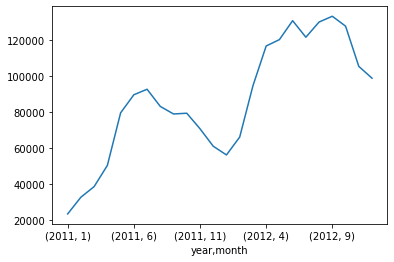

In [62]:
df.groupby(['year', 'month'])['count'].sum().plot()

### datetime의 column 일때 resample을 통해 간변하게 찾을 수 있다(pandas frequency resample)

In [63]:
df['count'].resample("Q").sum()

datetime
2011-03-31     95131
2011-06-30    220006
2011-09-30    255248
2011-12-31    211594
2012-03-31    217367
2012-06-30    368276
2012-09-30    385414
2012-12-31    332440
Freq: Q-DEC, Name: count, dtype: int64

### filter ( 설정한 기간의 data 조회 )

- something_range 함수로 기간 생성 : filter 지정
# 월별 data ; period에 저장
- period = pd.date_range(start='2011-01-01', end = '2011-05-31', freq = 'M')
- df["count"].resample('M').sum()[period]
- DatetimeIndex
- timedelta_range
- period_range
- interval_range

In [64]:
# 월별 data ; period에 저장
period = pd.date_range(start='2011-01-01', end = '2012-01-31', freq = 'M')
df["count"].resample('M').sum()[period]

datetime
2011-01-31    23552
2011-02-28    32844
2011-03-31    38735
2011-04-30    50517
2011-05-31    79713
2011-06-30    89776
2011-07-31    92848
2011-08-31    83296
2011-09-30    79104
2011-10-31    79522
2011-11-30    70889
2011-12-31    61183
2012-01-31    56332
Freq: M, Name: count, dtype: int64

In [65]:
df["count"].resample('M').sum()['2011-01-01':'2012-01-31']

datetime
2011-01-31    23552
2011-02-28    32844
2011-03-31    38735
2011-04-30    50517
2011-05-31    79713
2011-06-30    89776
2011-07-31    92848
2011-08-31    83296
2011-09-30    79104
2011-10-31    79522
2011-11-30    70889
2011-12-31    61183
2012-01-31    56332
Freq: M, Name: count, dtype: int64

### 요일별 자전거의 평균

<AxesSubplot:xlabel='day_of_the_week'>

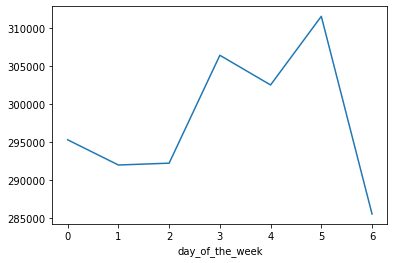

In [74]:
df['day_of_the_week'] = df.index.day_of_week
df.groupby('day_of_the_week')['count'].sum().plot()

## time shifting : 시간 차 분석

In [78]:
monthly_avg=df["count"].resample("M").mean()
monthly_avg.head()

datetime
2011-01-31     54.645012
2011-02-28     73.641256
2011-03-31     86.849776
2011-04-30    111.026374
2011-05-31    174.809211
Freq: M, Name: count, dtype: float64

In [79]:
# 2달 차이로 보기
monthly_avg.shift(periods=2,fill_value=0).head()

datetime
2011-01-31     0.000000
2011-02-28     0.000000
2011-03-31    54.645012
2011-04-30    73.641256
2011-05-31    86.849776
Freq: M, Name: count, dtype: float64

In [85]:
monthly_avg=df["count"].resample("M").mean()
# 2달 차이로 보기
result = []
# 초기 데이터 넣어주기
for period in range(1,6):
    shift_avg = monthly_avg.shift(periods=period,fill_value=0)
    result.append(shift_avg.rename(f'{period}_monthly_shift_avg'))

In [86]:
monthly_avg.head()

datetime
2011-01-31     54.645012
2011-02-28     73.641256
2011-03-31     86.849776
2011-04-30    111.026374
2011-05-31    174.809211
Freq: M, Name: count, dtype: float64

In [87]:
pd.concat(result, axis=1).head()

,1_monthly_shift_avg,2_monthly_shift_avg,3_monthly_shift_avg,4_monthly_shift_avg,5_monthly_shift_avg
datetime,,,,,
2011-01-31,0.000000,0.000000,0.000000,0.000000,0.0
2011-02-28,54.645012,0.000000,0.000000,0.000000,0.0
2011-03-31,73.641256,54.645012,0.000000,0.000000,0.0
2011-04-30,86.849776,73.641256,54.645012,0.000000,0.0
2011-05-31,111.026374,86.849776,73.641256,54.645012,0.0


> pandas에서 for loop을 쓰는 경우는 데이터를 붙여 넣을 때 주로 사용하고 웬만해선 사용 X

## moving average 
- 시계열 데이터는 일반적으로 노이즈가 발생하는데 노이즈를 줄이면서 추세를 보기위함

### rolling
- window : 몇 개의 데이터로 ~

<AxesSubplot:xlabel='datetime'>

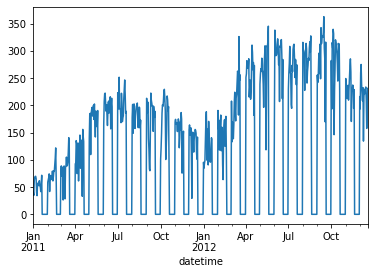

In [90]:
day_avg = df["count"].resample("D").mean().fillna(0)
day_avg.plot()

<AxesSubplot:xlabel='datetime'>

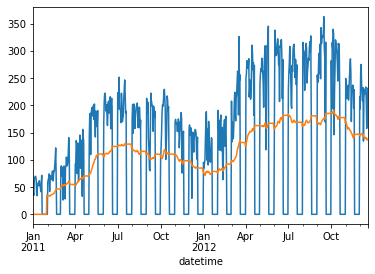

In [94]:
day_avg.plot()
day_avg.rolling(window=30).mean().fillna(0).plot()

## cumsum
- 누적합 (전체적인 추세를 보기 위해)

In [97]:
df["count"].resample("M").mean().head()

datetime
2011-01-31     54.645012
2011-02-28     73.641256
2011-03-31     86.849776
2011-04-30    111.026374
2011-05-31    174.809211
Freq: M, Name: count, dtype: float64

In [98]:
df["count"].resample("M").mean().cumsum().head()

datetime
2011-01-31     54.645012
2011-02-28    128.286267
2011-03-31    215.136043
2011-04-30    326.162417
2011-05-31    500.971627
Freq: M, Name: count, dtype: float64

In [104]:
monthly_avg = df["count"].resample("M").mean()
monthly_cumsum_avg=df["count"].resample("M").mean().cumsum()

monthly_avg = monthly_avg.rename("monthly_avg")
monthly_cumsum_avg = monthly_cumsum_avg.rename("avg_cumsum")

monthly_df = pd.concat([monthly_avg, monthly_cumsum_avg], axis=1)
monthly_df.head()

,monthly_avg,avg_cumsum
datetime,,
2011-01-31,54.645012,54.645012
2011-02-28,73.641256,128.286267
2011-03-31,86.849776,215.136043
2011-04-30,111.026374,326.162417
2011-05-31,174.809211,500.971627


<AxesSubplot:>

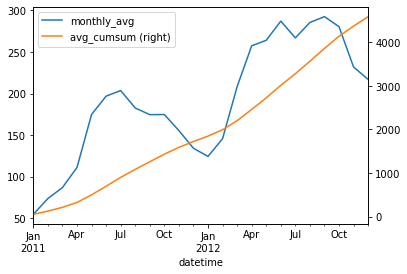

In [105]:
# 그냥 평균 그랴프
ax = monthly_df.plot(y="monthly_avg", use_index = True)

# ax와 같은 판을 사용해서 cumsum plot 그리기 (y수치를 두번째 축으로 나타내라)
monthly_df.plot(y="avg_cumsum", secondary_y=True, ax=ax, use_index = True)